# Life-Like Hexagonal Cellular Automata

This workbook simulates outer totalistic cellular automata (CA) like Conway's Game of Life, except with a hexagonal neighborhood of 6 cells. Hex CAs can be implemented the same way as life-like CAs using the Moore neighborhood of 8 cells, just using a different neighborhood and plotting on a skewed grid.

        . X .            X X X         . X X           . X X
        X O X            X O X         X O X            X O X
        . X .            X X X         X X .             X X .
    Von Neumann (4)    Moore (8)      Hex (6)          Hex (6)
                                  (on square grid) (on skewed grid)

Interesting rules:
* B2/S34 : A variety of oscillators
* B156/S12{56} : Maze-like structures

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from scipy.ndimage import convolve
from ipywidgets import interact
%matplotlib inline

In [2]:
#define parameters
n = 25 #size of array
steps = 100 # number of steps to run for
filled = 0.5#what % of the array should be randomly filled with live cells
birth = [1, 5, 6] #birth rules
survive = [1, 2] #survival rules

#will explain this in the next cell


In [3]:
#The trick is to code the center cell as a value 
#outside the range of the sum of the outer cells
#(-128 works), and then we can just convolute the 
#neighborhood matrix with the array and look up 
#whether the sum is in the rule list or not.

nb = np.array([[1,    1, 0], #neighborhood
               [1, -128, 1], #appears upside-down from the intro material
               [0,    1, 1]])

def ca_step(in_array, rule, nb=nb, mode='wrap'):
    result = convolve(in_array.getfield(dtype=np.int8),
                nb, mode=mode)
    return np.in1d(result, rule).reshape(in_array.shape)

In [4]:
#Accordingly, the survival rules are coded as (# live cells - 128).
rule = np.array(birth + [i - 128 for i in survive], dtype=np.int8)

result = np.empty((steps+1,n,n), dtype=bool)
result[0] = np.random.uniform(size=(n,n)) > filled
#result[0,12,12] = True
for i in range(steps):
    result[i+1] = ca_step(result[i], rule=rule)

In [5]:
#hex grid to plot the results on
t = np.linspace(0,2*np.pi,endpoint=False, num=6)
single_hex = np.array([np.sin(t),np.cos(t)])

axis = np.arange(n)
centers = np.array(np.meshgrid(axis, axis), dtype=float)
centers[0] -= centers[1]/2
centers[0] *= 2*single_hex[0,1]
centers[1] *= 1.5
hexes = centers[..., np.newaxis] + single_hex[:,np.newaxis,np.newaxis]
vertices = np.rollaxis(hexes, 0, 4).reshape(-1,6,2)
xlim = (np.min(vertices[..., 0]), np.max(vertices[..., 0]))
ylim =(np.min(vertices[..., 1]), np.max(vertices[..., 1]))

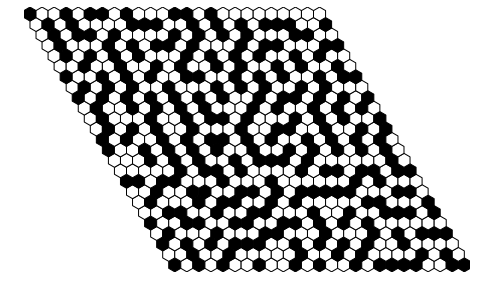

<function __main__.ca_plot>

In [6]:
def ca_plot(step=steps):
    fig = plt.figure()
    fig.set_size_inches(8,6)
    ax = plt.axes()
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect("equal")  

    coll = PolyCollection(vertices, array=result[step].flatten(),cmap=mpl.cm.binary)
    ax.add_collection(coll)

    plt.axis('off')
    plt.show()

interact(ca_plot, step=(0, steps))
#Black is alive, white is dead
#This is interactive if you actually download the workbook and run it